## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import dtale as dt
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("final_data.csv")

In [5]:
dt.show(df)

In [29]:
df.shape

(10754, 22)

In [30]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [17]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [18]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [3]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['height',
                        'age',
                        'appearance',
                        'goals',
                        'assists', 
                        'ellow cards' ,
                        'second yellow cards',
                        'red cards ',
                        'goals' ,
                        'conceded',
                         'clean',
                         'sheets', 
                        'minutes', 
                        'played', 
                        'days_injured',
                         'games_injured' ,
                        'current_value ',
                        'highest_value ', 
                        'position_encoded',
                         'winger ' ]
numeric_features = ['player','team ','name','position ']

In [4]:
df = pd.read_csv("final_data.csv")

In [5]:
correlation_matrix = df.corr()

# Extract the correlations with the 'highest_value' column
correlations_with_highest_value = correlation_matrix["highest_value"]

# Find the column with the highest correlation to 'highest_value', excluding itself
highest_corr_column = correlations_with_highest_value.drop("highest_value").idxmax()
highest_corr_value = correlations_with_highest_value.drop("highest_value").max()

print("Column with highest correlation to 'highest_value':", highest_corr_column)
print("Highest correlation value:", highest_corr_value)

Column with highest correlation to 'highest_value': current_value
Highest correlation value: 0.8345530981111612


In [6]:

thresholds = {
    'high price': df['highest_value'].quantile(0.75),
    'good price': df['highest_value'].quantile(0.50),
    'cheap price': df['highest_value'].quantile(0.25)
}

# Function to categorize values
def categorize_value(value):
    if value >= thresholds['high price']:
        return 'high price'
    elif value >= thresholds['good price']:
        return 'good price'
    else:
        return 'cheap price'

# Apply the categorize_value function to create the 'price_category' column
df['price_category'] = df['highest_value'].apply(categorize_value)

# Map categories to numerical values for encoding
df['price_category_encoded'] = df['price_category'].map({
    'cheap price': 0,
    'good price': 1,
    'high price': 2
})

# Define the features and target variable
features = ['appearance','minutes played', 'award', 'current_value']
# X = df[features]
# y = df['price_category_encoded']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the parameter grid for hyperparameter tuning



In [7]:
features = ['appearance','minutes played', 'award', 'current_value']

In [8]:
X = df[features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print(sklearn.show_versions())


System:
    python: 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]
executable: /opt/anaconda3/bin/python
   machine: macOS-14.5-arm64-arm-64bit

Python dependencies:
      sklearn: 1.5.0
          pip: 24.0
   setuptools: 68.2.2
        numpy: 1.26.4
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /opt/anaconda3/lib/python3.11/site-packages/numpy/.dylibs/libopenblas64_.0.dylib
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: armv8
    num_threads: 8

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /opt/anaconda3/lib/python3.11/site-packages/scipy/.dylibs/libopenblas.0.dylib
        version: 0.3.18
threading_layer: pthreads
   architecture: armv8
    num_threads: 8

       user_api: openmp
   intern

In [14]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

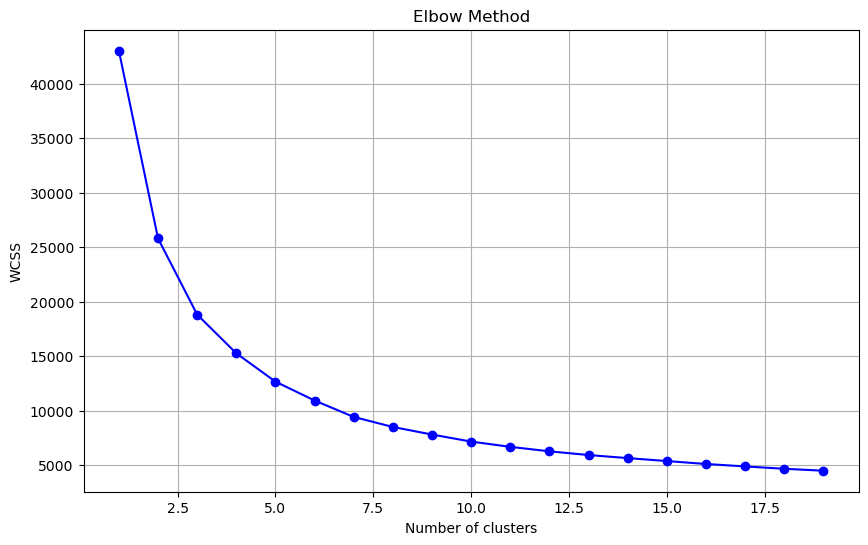

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [16]:
optimal_clusters = 7 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [17]:
# fit the model (train)
y_pred = model.fit_predict(X_scaled)

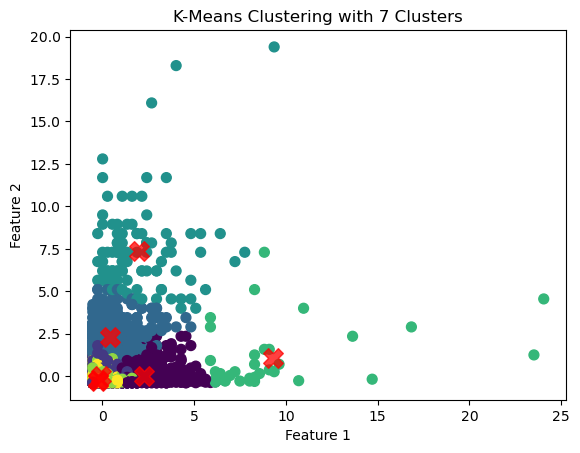

In [18]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
X['kmeans'] = y_pred

In [20]:
X['kmeans'].value_counts()

1    4498
6    2865
5    2161
0     590
2     504
3     100
4      36
Name: kmeans, dtype: int64

In [21]:
X[X['kmeans']==0]

,appearance,minutes played,award,current_value,kmeans
6,70,5471,10,15000000,0
19,31,1157,6,17000000,0
30,52,2481,6,15000000,0
32,41,3606,16,8000000,0
36,72,4852,12,18000000,0
...,...,...,...,...,...
10646,36,2770,8,500000,0
10662,44,2847,14,1800000,0
10678,52,4537,7,150000,0
10690,52,2958,8,700000,0


<Axes: xlabel='current_value', ylabel='appearance'>

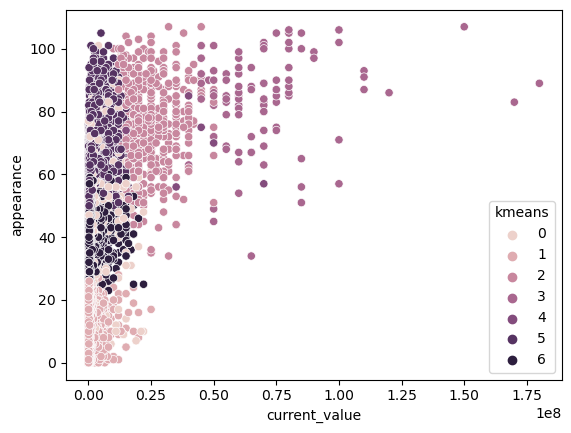

In [23]:
sns.scatterplot(data = X , y = 'appearance', x = 'current_value', hue = 'kmeans')

<Axes: xlabel='award', ylabel='minutes played'>

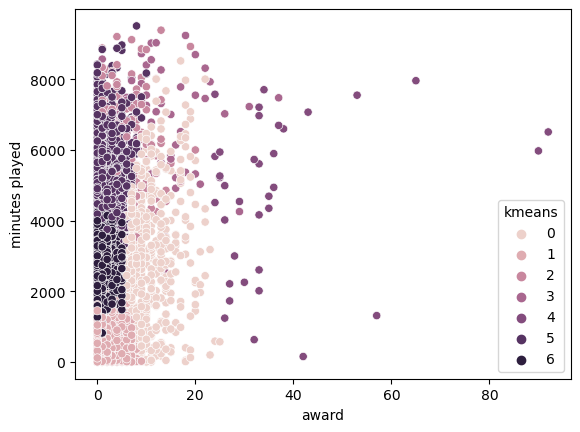

In [24]:
sns.scatterplot(data = X , x = 'award', y = 'minutes played', hue = 'kmeans')